# Flights Data Exploration
## by Thays Martinez

## Preliminary Wrangling

This document explores a sample of flights within United States and Canada which were registered between the years of 2015 and 2019. The dataset contains approximatelty 500,000 flights, and 31 variables.

In [199]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

# Import custom module to plot chart annotations
# import chart_annotations as ca
from chart_annotations import *

%matplotlib inline

In [2]:
# Load dataset into a pandas DataFrame
df_flights = pd.read_csv('flights.csv', low_memory=False)

In [3]:
# High-level overview of the data shape and composition
pd.set_option('display.max_columns', 35)
df_flights.head()

,date,year,month,weekday,dep_airport,dep_city,dep_state,dest_airport,dest_city,dest_state,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,fl_type,canc_desc,crs_elapsed_time,elapsed_time,air_time,distance,Carrier,Weather,NAS,Security,Late Aircraft
0,2019-01-30,2019,1,3,FNT,Flint,MI,ATL,Atlanta,GA,06:00:00,05:54:00,-6.0,38.0,06:32:00,08:14:00,4.0,08:20:00,08:18:00,-2.0,On time,NaN,140.0,144.0,102.0,645.0,NaN,NaN,NaN,NaN,NaN
1,2019-10-18,2019,10,5,CMH,Columbus,OH,MIA,Miami,FL,06:57:00,07:13:00,16.0,23.0,07:36:00,09:48:00,4.0,09:41:00,09:52:00,11.0,On time,NaN,164.0,159.0,132.0,990.0,NaN,NaN,NaN,NaN,NaN
2,2016-11-18,2016,11,5,MIA,Miami,FL,LAX,Los Angeles,CA,07:30:00,07:31:00,1.0,17.0,07:48:00,09:48:00,10.0,10:16:00,09:58:00,-18.0,On time,NaN,346.0,327.0,300.0,2342.0,NaN,NaN,NaN,NaN,NaN
3,2019-05-13,2019,5,1,LRD,Laredo,TX,DFW,Dallas/Fort Worth,TX,16:14:00,16:16:00,2.0,15.0,16:31:00,17:30:00,8.0,17:45:00,17:38:00,-7.0,On time,NaN,91.0,82.0,59.0,396.0,NaN,NaN,NaN,NaN,NaN
4,2017-04-19,2017,4,3,LAX,Los Angeles,CA,MSY,New Orleans,LA,09:25:00,09:40:00,15.0,16.0,09:56:00,15:05:00,2.0,15:07:00,15:07:00,0.0,On time,NaN,222.0,207.0,189.0,1670.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_flights.describe()

,year,month,weekday,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,elapsed_time,air_time,distance,Carrier,Weather,NAS,Security,Late Aircraft
count,498818.000000,498818.000000,498818.000000,491127.000000,491127.000000,491127.000000,491127.000000,498818.000000,491127.000000,491127.000000,498818.000000,91316.000000,91316.000000,91316.000000,91316.000000,91316.000000
mean,2017.147226,6.556540,3.936853,9.792080,16.812892,7.558230,4.624533,143.058725,138.110051,113.738929,821.926867,20.070973,3.196329,15.316462,0.084980,25.544998
std,1.432033,3.401067,1.991291,43.743418,9.452428,5.945651,45.972517,74.640400,74.227750,72.146601,606.833104,59.471621,27.165795,34.337149,2.286093,50.144153
min,2015.000000,1.000000,1.000000,-48.000000,1.000000,0.000000,-94.000000,18.000000,15.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,2.000000,-5.000000,11.000000,4.000000,-14.000000,88.000000,83.000000,61.000000,372.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,7.000000,4.000000,-2.000000,14.000000,6.000000,-6.000000,124.000000,119.000000,95.000000,651.000000,1.000000,0.000000,2.000000,0.000000,3.000000
75%,2018.000000,9.000000,6.000000,6.000000,20.000000,9.000000,7.000000,174.000000,170.000000,144.000000,1062.000000,18.000000,0.000000,19.000000,0.000000,31.000000
max,2019.000000,12.000000,7.000000,1649.000000,175.000000,324.000000,1636.000000,718.000000,717.000000,684.000000,5095.000000,1636.000000,1443.000000,1457.000000,244.000000,1349.000000


In [5]:
print(df_flights.shape)
print(df_flights.info())

(498818, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498818 entries, 0 to 498817
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              498818 non-null  object 
 1   year              498818 non-null  int64  
 2   month             498818 non-null  int64  
 3   weekday           498818 non-null  int64  
 4   dep_airport       498818 non-null  object 
 5   dep_city          498818 non-null  object 
 6   dep_state         498818 non-null  object 
 7   dest_airport      498818 non-null  object 
 8   dest_city         498818 non-null  object 
 9   dest_state        498818 non-null  object 
 10  crs_dep_time      498818 non-null  object 
 11  dep_time          491127 non-null  object 
 12  dep_delay         491127 non-null  float64
 13  taxi_out          491127 non-null  float64
 14  wheels_off        491127 non-null  object 
 15  wheels_on         491127 non-null  object 
 16  taxi_in

Observing the raw data, a few transformations still need to be performed for better analysis.

For simplicity, scheduled departure and arrival times can be broken down into the hour component.

In [6]:
# Breakdown datetime objects and convert to int
df_flights['crs_dep_hour'] = df_flights.crs_dep_time.str.slice(0, 2)
df_flights['crs_arr_hour'] = df_flights.crs_arr_time.str.slice(0, 2)

Some of the variables in this dataset are in the wrong data type, therefore needs to be converted.

In [7]:
# Convert to string data type
variables_str = ['year', 'month', 'weekday']
convert_str = lambda x: x.astype(str) if x.name in variables_str else x
df_flights = df_flights.apply(convert_str)

# Pad zero to month string
df_flights['month'] = df_flights.month.str.zfill(2)

# Convert to category data type
variables_cat = ['fl_type', 'canc_desc', 'diverted']
convert_cat = lambda x: x.astype('category') if x.name in variables_cat else x
df_flights = df_flights.apply(convert_cat)

In [8]:
# Reorder columns
columns = ['date', 'year', 'month', 'weekday', 'dep_airport', 'dep_city', 'dep_state',
           'dest_airport', 'dest_city', 'dest_state', 'crs_dep_hour', 'crs_dep_time', 
           'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
           'crs_arr_hour', 'crs_arr_time', 'arr_time', 'arr_delay', 'fl_type', 
           'canc_desc', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance', 
           'Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

df_flights = df_flights[columns]

### What is the structure of your dataset?

This sample dataset contains 498,818 flights. It is comprised of 33 features: date, year, month, weekday, dep_airport, dep_city, dep_state, dest_airport, dest_city, dest_state, crs_dep_hour, crs_dep_time, dep_time, dep_delay, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_hour, crs_arr_time, arr_time, arr_delay, fl_type, canc_desc, crs_elapsed_time, elapsed_time, air_time, distance, Carrier, Weather, NAS, Security, Late Aircraft.


The columns Carrier, Weather, NAS, Security and Late Aircraft indicate the delay duration in minutes for flights which were not diverted and have been finalized. These features have the following definitions:

- **Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **NAS:** Stands for National Aviation System. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- **Late Aircraft:** a previous flight with same aircraft arrived late, causing the present flight to depart late.

Most variables are either numeric or object types. The variable **cancellation_desc** is categorical and, apart from Late Aircraft (which occurs only if a flight has been finalized), its values has the same classification as above.

### What is/are the main feature(s) of interest in your dataset?

The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. I'm interested in figuring out what factors have the most influence in flight cancellations and delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although delay cause gives a good indication of the reason a flight is delayed, I am also expecting that the flight date and time, origin state, scheduled departure time and arrival delay will have effects on flight's cancellation and delay duration. I also think that other features will have effects on the cancellation and delay's duration, though to a much smaller degree.

## Univariate Exploration

I'll start by looking at the distribution of flight types. 

In [10]:
# Set default plot parameters
base_color = sb.color_palette()[0]

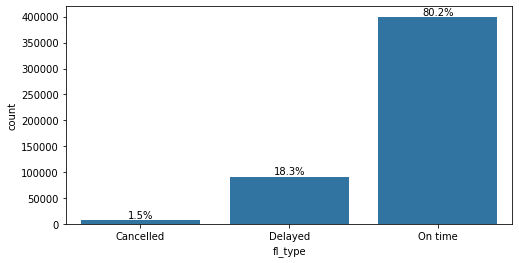

In [11]:
plt.figure(figsize=[8, 4])
sb.countplot(data=df_flights, x='fl_type', color=base_color)
ca.chart_props(df_flights, 'fl_type');

Flight types are divided between Cancelled, Delayed (if delay duration is equal or above 15 minutes) and On time. Data suggests that 80.2% of flights between 2015 and 2019 are considered to arrive on time. Delays account for 18.3%, and 1.5% of flights were cancelled.

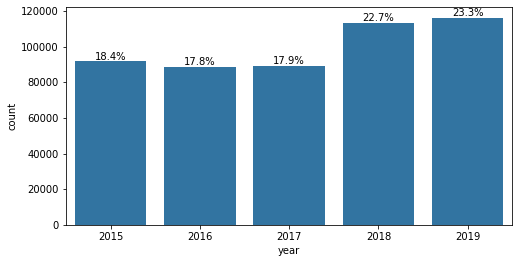

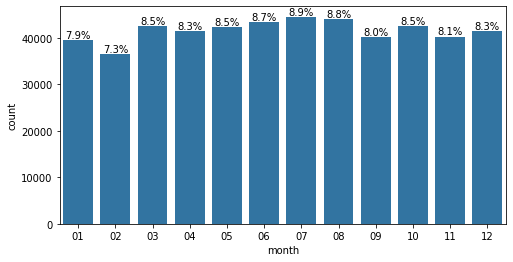

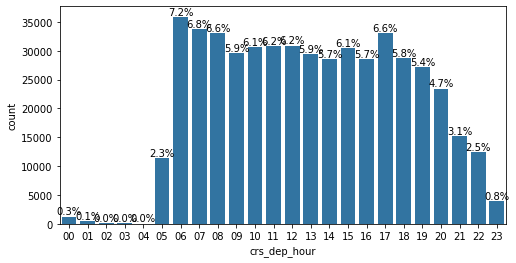

In [12]:
variables = ['year', 'month', 'crs_dep_hour']

for variable in variables:
    plt.figure(figsize=[8, 4])
    sb.countplot(data=df_flights, x=variable, color=base_color)
    ca.chart_props(df_flights, variable);

Number of flights remained stable during the first 3 years. In 2018, however, flights had an increase of nearly 5% when comparing to the previous year, suggesting an increase in demand. 2019 registered an even higher demand for flights, with 23.3% against 22.7% in 2018.

Flight demand seems well distributed between months. February has the lowest demand, whereas June, July and August register the highest demand, suggesting that summer holidays may be the influence factor for this trend.

Due to airports operation times, data shows that majority of flights are registered between 5am and 11pm. It also suggests that the preferred hours to fly are early in the morning (between 6am and 9am) and at 6pm in the evening, from when number of flights starts to ramp down until 11pm. 

Total number of states: 54


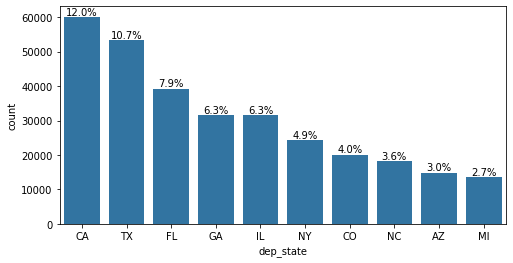

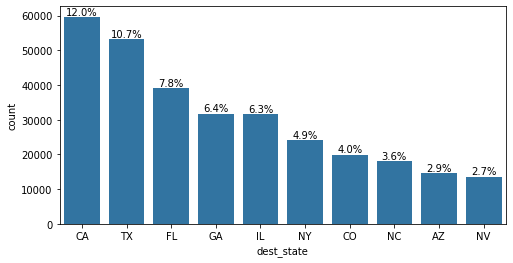

In [13]:
variables = ['dep_state', 'dest_state']

for variable in variables:
    order_var = df_flights[variable].value_counts().index[:10] # Limit to 10 states
    plt.figure(figsize=[8, 4])
    sb.countplot(data=df_flights, x=variable, color=base_color, order=order_var)
    ca.chart_props(df_flights, variable);
    
nb_states = len(df_flights.dest_state.value_counts().index)
print('Total number of states:', nb_states)

Interestingly, except for Michigan (MI) and State of Nevada (NV) the departure state matches the arrival state in the ranking order. Proportions are also almost identical. 10 of the 54 states accounts for over 60% of flight demand, with California (CA) and Texas (TX) leading the ranking with over 10% of flights each. These states are home to airports with the highest amount of passenger traffic in US.

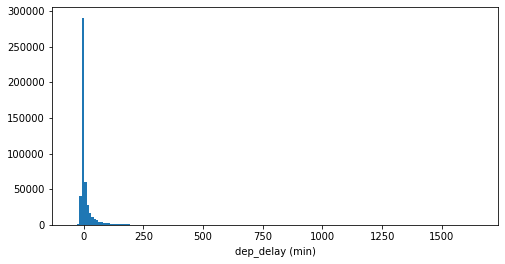

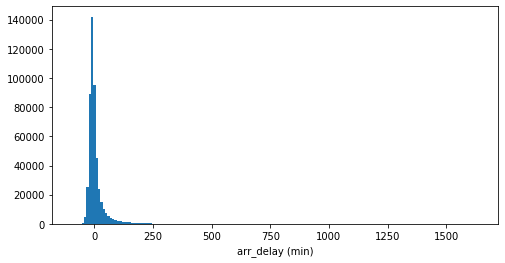

In [14]:
# Start with a standard-scaled plot
variables = ['dep_delay', 'arr_delay']

for variable in variables:
    max_taxi = df_flights[variable].max()
    min_taxi = df_flights[variable].min()
    bin_edges = np.arange(min_taxi, max_taxi+10, 10)
    plt.figure(figsize=[8, 4])
    plt.hist(data=df_flights, x=variable, bins=bin_edges)
    plt.xlabel('{} (min)'.format(variable));

On the plots above, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of both plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [35]:
# Select high outliers, using criteria eyeballed from the plots
high_outliers = df_flights['arr_delay'] > 240 # Delays above 4 hours

nb_outliers = high_outliers.sum()
pct_outliers = (nb_outliers/len(df_flights)*100).round(3)

print('{} total - {}% outliers'.format(nb_outliers, pct_outliers))
print('\n')
print(df_flights.loc[high_outliers, 'arr_delay'].describe())
print('\n')
print(df_flights.loc[high_outliers, ['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']]
                .sample(30).reset_index(drop=True))

2515 total - 0.504% outliers


count    2515.000000
mean      400.135586
std       219.198042
min       241.000000
25%       267.000000
50%       312.000000
75%       425.000000
max      1636.000000
Name: arr_delay, dtype: float64


   crs_dep_time  dep_time crs_arr_time  arr_time
0      08:30:00  14:54:00     12:15:00  18:17:00
1      20:25:00  00:37:00     21:42:00  01:58:00
2      06:59:00  17:19:00     10:09:00  20:13:00
3      06:00:00  10:19:00     10:58:00  14:59:00
4      16:31:00  22:03:00     19:35:00  01:02:00
5      18:20:00  00:31:00     18:25:00  00:38:00
6      17:25:00  23:24:00     19:04:00  00:51:00
7      08:56:00  17:42:00     11:30:00  20:20:00
8      09:58:00  15:45:00     11:27:00  17:04:00
9      17:00:00  21:53:00     18:27:00  23:32:00
10     20:10:00  01:05:00     21:13:00  01:57:00
11     17:54:00  20:57:00     19:52:00  23:54:00
12     07:30:00  06:46:00     11:10:00  10:28:00
13     19:00:00  22:24:00     20:46:00  00:52:00
14     13:19:00  17:31:00     17

Arrival delays are calculated by the difference between actual and scheduled arrival times. There are 2515 flights with arrival delay above 4 hours, representing only 0.5% of the flights analyzed. The descriptive statistics from high outliers show that 75% of these have delays betwen 241 and 425 minutes. 

The statistics also show that some of the high outliers have delays over 24 hours. Since the arrival date feature are missing from the dataset, I cannot calculate the real arrival times, therefore I will treat outliers separately. For now I will limit the x-axis to display the bulk of the distribution.

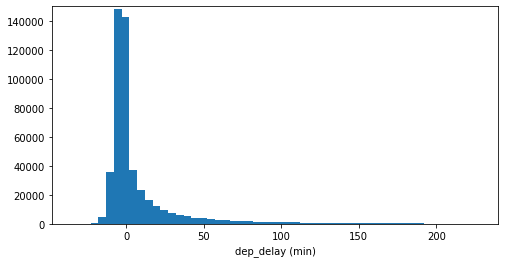

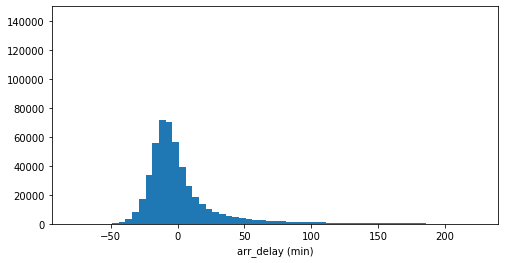

In [36]:
# There is a long tail in the distribution, so let's limit 
# the x-axis to 250 min
variables = ['dep_delay', 'arr_delay']

for variable in variables:
    max_delay = df_flights[variable].max()
    min_delay = df_flights[variable].min()
    bin_edges = np.arange(min_delay, max_delay+5, 5)
    plt.figure(figsize=[8, 4])
    plt.hist(data=df_flights, x=variable, bins=bin_edges)
    plt.xlim(min_delay, 240)
    plt.ylim(0, 150000)
    plt.xlabel('{} (min)'.format(variable));

Departure and arrival delay variables still have a long-tailed distribution, with a lot of flights actually departing and arriving ahead or on time, and fewer flights on the high delay end.

Interestingly, there is a larger spike just before the 0 min delay mark in the departure delay graph, showing that to a large degree, actual departure times follow the scheduled time. On the other hand, distribution in the arrival delay duration are more spread out to both sides of the 0 min delay mark. 

Both distributions suggests that (1) to some degree actual departure times can affect actual arrival times both positively and negatively, and in the occurrence of the latter (2) actual departure times are compensated during taxiing and / or flight time.

Max taxi duration during taxi_out: 175.0
Max taxi duration during taxi_in: 324.0


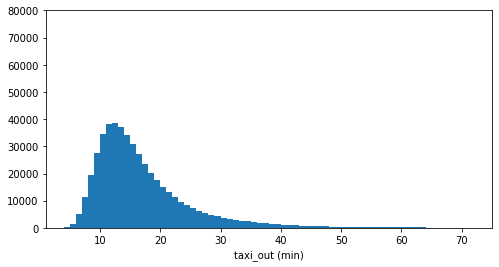

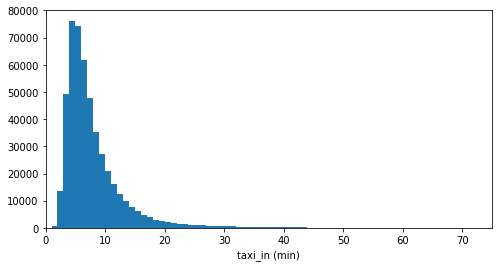

In [37]:
# Plot aircraft taxiing duration
variables = ['taxi_out', 'taxi_in']

for variable in variables:
    max_taxi = df_flights[variable].max()
    min_taxi = df_flights[variable].min()
    bin_edges = np.arange(min_taxi, max_taxi+1, 1)
    plt.figure(figsize=[8, 4])
    plt.hist(data=df_flights, x=variable, bins=bin_edges)
    plt.xlim(min_taxi, 75)
    plt.ylim(0, 80000)
    plt.xlabel('{} (min)'.format(variable));
    print('Max taxi duration during {}: {}'.format(variable, max_taxi))

There is also a long-tail distribution with some points taking unusually high values. Also here I am applying limits to the x-axis to focus on the bult of the distribution.

Taxi-out time is defined as the time between the actual pushback and wheels-off. Aircraft taxiing duration on departure has a wider distribution, with most flights taking between 10 to 20 minutes to taxi. 

There is a narrower distribution in taxiing times at arrival with most flights taking between 0 to 10 minutes taxiing, which suggests that airport operators try to compensate long taxi-out times by adjusting schedule, gates assignment and/or controlling taxiing speed at arrival.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Departure delay, arrival delay, taxi-out and taxi-in features took in a large range on values, so I limited the x-axis limits accordingly to focus on the bulk of distributions.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The long-tail distribution on the arrival delay feature demonstrate a number of outliers in the dataset. I used a visual assessment of the chart to define a threshold for outliers, applied descriptive statistics to understand the frequency and found that outliers take only 0.5% of flights analyzed. 

Features like arrival date and actual arrival time would enable me to calculate the arrival delay and validate if these are real outliers. Since these are missing from the dataset, there is no way validate, therefore I decided to keep the data and analyze/transform at a later stage, when diving into the delayed flights data.

## Bivariate Exploration

In this part of the exploration, I will concentrate the analysis on Delayed and Cancelled flights.

As discussed in the previous section, there are only a few instances where arrival delays take several hours. To have a better understanding of the data distribution, I will use data binning to convert arrival delays into 4 categories: Short Delay, Medium Delay, Long Delay and Severe Delay.

In [78]:
df_delays = df_flights.query('fl_type == "Delayed"').reset_index(drop=True)

In [91]:
bins = [15, 61, 151, 331, max(df_delay.arr_delay)]
cat_names = ['Short (15 - 60 min.)', 'Medium (61 - 150 min.)', 'Long (151 - 330 min.)', 'Severe (above 330 min.)']

In [92]:
df_delays['delay_binned'] = pd.cut(df_delays['arr_delay'], bins, labels=cat_names, include_lowest=True)

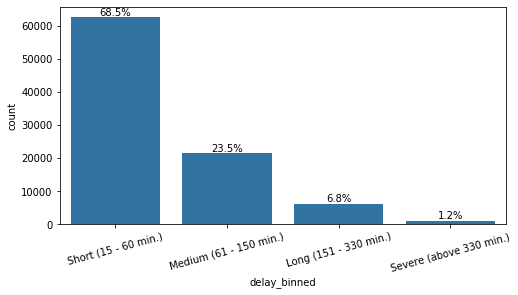

In [94]:
plt.figure(figsize=[8, 4])
sb.countplot(data=df_delays, x='delay_binned', color=base_color)
ca.chart_props(df_delays, 'delay_binned')
plt.xticks(rotation=15);

Short-delay flights are almost 3 times more frequent than Medium-delay's, and together both represent 92% of the delayed flights in this dataset.

Next, let's take a look at the distribution of delay types across the 5-year period.

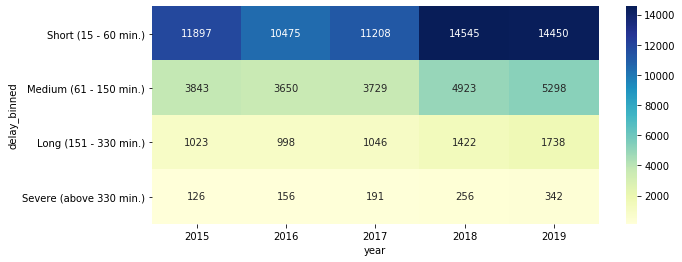

In [167]:
ct_counts = df_delays.groupby(['year', 'delay_binned']).size()
ct_counts = ct_counts.reset_index(name='count').pivot(index='delay_binned', columns='year', values='count')

plt.figure(figsize=[10, 4])
sb.heatmap(ct_counts, annot=True, fmt='d', cmap='YlGnBu');

As described in the previous section, number of flights increases significantly in 2018 and 2019. The heatmap also  indicates the rise in in the number of flights in each delay category for both years. 

Interestingly, severe-delayed flight category is the only which increases at a steady rate in all years. 

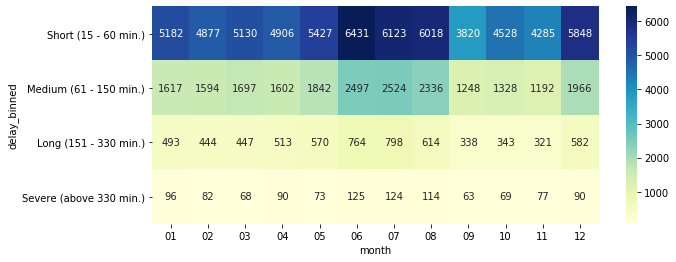

In [146]:
ct_counts = df_delays.groupby(['month', 'delay_binned']).size()
ct_counts = ct_counts.reset_index(name='count').pivot(index='delay_binned', columns='month', values='count')

plt.figure(figsize=(10, 4))
sb.heatmap(ct_counts, cmap='YlGnBu', annot=True, fmt='d');

One trend observed previously repeats when looking into the relationship between delay types and months. June, July, August and December concentrate the majority of flight delays in each category, with a strong indication that holidays season is when flights are more prone to suffer all types of delays. 

Overall, the number of delayed flights across all delay types are lower in the months of September, October and November.

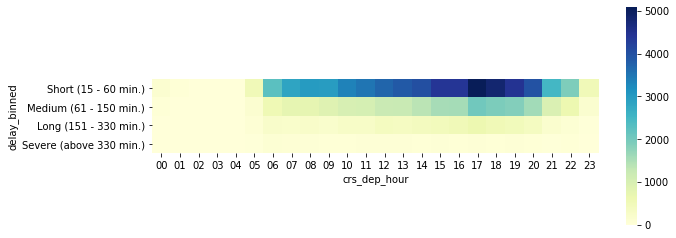

In [175]:
ct_counts = df_delays.groupby(['crs_dep_hour', 'delay_binned']).size()
ct_counts = ct_counts.reset_index(name='count').pivot(index='delay_binned', columns='crs_dep_hour', values='count')

plt.figure(figsize=(10, 4))
sb.heatmap(ct_counts, cmap='YlGnBu', square=True);

> Comment above chart

In [147]:
value_vars = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

melt_delay = pd.melt(df_delay, value_vars=value_vars, 
                   var_name='delay_desc', value_name='delay_dur')

index_names = melt_delay[melt_delay['delay_dur'] == 0].index
melt_delay.drop(index_names, inplace=True)
melt_delay.reset_index(drop=True, inplace=True)

AttributeError: module 'chart_annotations' has no attribute 'chart_nb'

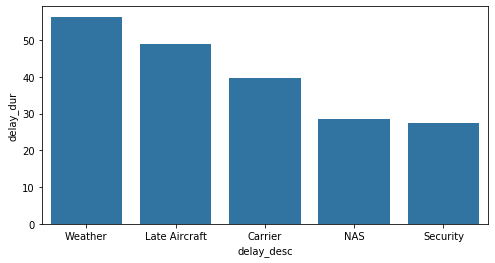

In [203]:
data = melt_delay.groupby(['delay_desc']).mean()
data = data.reset_index().sort_values('delay_dur', ascending=False)

plt.figure(figsize=[8, 4])
sb.barplot(data=data, x='delay_desc', y='delay_dur', color=base_color)
ca.chart_nb(data, 'delay_dur')
plt.xticks(rotation=15);

In [ ]:
plt.figure(figsize=[8, 4])
sb.regplot(data=df_flights, x='arr_delay', y='taxi_out', scatter_kws={'alpha': 1/8})
plt.xlabel('Arrival Delay Duration (min)')
plt.ylabel('Taxi-out Duration (min)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!